In [11]:
import numpy as np
import tensorflow as tf
import os
import scipy.misc
from easydict import EasyDict as edict
from WESPE_DIV2K import *
from dataloader.dataloader_DIV2K import *
from ops import *
from utils import *
os.environ["CUDA_VISIBLE_DEVICES"]="0"
%reload_ext autoreload
%autoreload 2

config = edict()
# training parameters
config.batch_size = 64#32
config.patch_size = 100
config.mode = "RGB"
config.channels = 3
config.content_layer = 'relu2_2' # originally relu5_4 in DPED
config.learning_rate = 1e-4
config.augmentation = True #data augmentation (flip, rotation)
config.test_every = 200
config.train_iter = 50000
# config.sample_size = 100000
# weights for loss
config.w_content = 1 # reconstruction (originally 1)
config.w_color = 2 # gan color (originally 5e-3)
config.w_texture = 1 # gan texture (originally 5e-3)
config.w_tv = 400 # total variation (originally 400)
config.gamma = 0.6
config.model_name = "WESPE_DIV2K"
# directories
config.dataset_name = "iphone"
config.train_path_phone = os.path.join("/mnt/sde/palparmar/dataset/dped/dped/iphone/training_data/iphone/","*.jpg")
config.train_path_canon = os.path.join("/mnt/sde/palparmar/dataset/dped/dped/iphone/training_data/canon/","*.jpg")
config.train_path_DIV2K = os.path.join("/mnt/sde/palparmar/dataset/dped/DIV2K_valid_HR/","*.png")

config.test_path_phone_patch = os.path.join("/mnt/sde/palparmar/dataset/dped/sample_images/original_images", str(config.dataset_name),"*.jpg")
config.test_path_phone_image = os.path.join("/mnt/sde/palparmar/dataset/dped/sample_images/original_images/canon/*.jpg")

config.vgg_dir = "../vgg_pretrained/imagenet-vgg-verydeep-19.mat"

config.result_dir = os.path.join("./result", config.model_name)
config.result_img_dir = os.path.join(config.result_dir, "samples")
config.checkpoint_dir = os.path.join(config.result_dir, "model")

if not os.path.exists(config.checkpoint_dir):
    print("creating dir...", config.checkpoint_dir)
    os.makedirs(config.checkpoint_dir)
if not os.path.exists(config.result_dir):
    print("creating dir...", config.result_dir)
    os.makedirs(config.result_dir)
if not os.path.exists(config.result_img_dir):
    print("creating dir...", config.result_img_dir)
    os.makedirs(config.result_img_dir)
    
config.sample_dir = "samples_DIV2K"
if not os.path.exists(config.sample_dir):
    print("creating dir...", config.sample_dir)
    os.makedirs(config.sample_dir)

In [6]:
# load dataset
dataset_phone, dataset_canon, dataset_DIV2K = load_dataset(config)

Dataset: iphone, 160471 images
DIV2K: 100 images
160471 images loaded! setting took: 212.2627s


In [7]:
# index = np.random.randint(len(dataset_phone))
phone_img = dataset_phone[0]
canon_img = dataset_canon[0]
DIV2K_img = dataset_DIV2K[0]
import matplotlib.pyplot as plt
plt.imshow(phone_img)
# plt.imshow(canon_img)
# plt.imshow(DIV2K_img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
phone_batch, canon_batch, DIV2K_batch = get_batch(dataset_phone, dataset_canon, dataset_DIV2K, config, start = 0)
print('done!')

done!


In [17]:
# sess= tf.InteractiveSession()
# blurred2 = sess.run(gaussian_blur(tf.image.rgb_to_yuv(DIV2K_batch)))

blurred = sess.run(gaussian_blur(tf.image.rgb_to_yuv(phone_batch)))

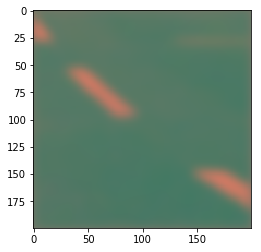

In [18]:
phone_img = postprocess(blurred2[5])
canon_img = postprocess(blurred[5])
DIV2K_img = postprocess(DIV2K_batch[5])
import matplotlib.pyplot as plt
plt.imshow(phone_img)
# plt.imshow(canon_img)
# plt.imshow(DIV2K_img)
plt.show()

In [ ]:
DIV2K_batch[0]

In [12]:
# build WESPE model
tf.reset_default_graph()
# uncomment this when only trying to test the model
# dataset_phone = []
# dataset_DIV2K = []
sess = tf.Session()
model = WESPE(sess, config, dataset_phone, dataset_canon, dataset_DIV2K)

Completed building generator. Number of variables: 26
Discriminator-color (blur)
Discriminator-texture
Discriminator-color (blur)
Discriminator-texture
Completed building color discriminator. Number of variables: 22
Completed building texture discriminator. Number of variables: 22


In [13]:
# train generator & discriminator together
model.train(load = False)

 Overall training starts from beginning
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 0, runtime: 5.851 s, generator loss: 496545.593750
Loss per component: content 44512.511719, color 0.732797, texture 0.736266, tv 1130.077148
(runtime: 16.686 s) Average test PSNR for 200 random test image patches: phone-enhanced 11.106
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 200, runtime: 88.561 s, generator loss: 401173.000000
Loss per component: content 40746.035156, color 736.160400, texture 577.641479, tv 895.942505
(runtime: 15.384 s) Average test PSNR for 200 random test image patches: phone-enhanced 11.733
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 400, runtime: 169.474 s, generator loss: 251984.593750
Loss per component: content 51482.453125, color 741.009033, texture 233.820694, tv 496.965759
(runtime: 15.667 s) Average test PSNR for 200 random test image patches: phone-enhanced 11.387
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100

(runtime: 15.464 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.487
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 5400, runtime: 2203.406 s, generator loss: 163775.062500
Loss per component: content 26955.517578, color 694.943237, texture 722.928833, tv 336.766846
(runtime: 16.300 s) Average test PSNR for 200 random test image patches: phone-enhanced 18.949
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 5600, runtime: 2284.853 s, generator loss: 165591.578125
Loss per component: content 26916.736328, color 279.726196, texture 1009.358154, tv 342.765076
(runtime: 15.225 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.927
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 5800, runtime: 2365.190 s, generator loss: 148470.093750
Loss per component: content 25473.160156, color 1547.177368, texture 1311.711182, tv 296.477142
(runtime: 14.818 s) Average test PSNR for 200 random test image pat

(runtime: 14.112 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.566
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 11000, runtime: 4481.092 s, generator loss: 154361.406250
Loss per component: content 29424.537109, color 718.665527, texture 543.876709, tv 307.389160
(runtime: 15.565 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.841
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 11200, runtime: 4562.923 s, generator loss: 131036.640625
Loss per component: content 22267.615234, color 552.162170, texture 657.633972, tv 267.517670
(runtime: 14.356 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.545
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 11400, runtime: 4643.997 s, generator loss: 135091.125000
Loss per component: content 22822.457031, color 537.825317, texture 727.342651, tv 276.164185
(runtime: 15.399 s) Average test PSNR for 200 random test image pat

(runtime: 15.963 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.418
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 16400, runtime: 6686.172 s, generator loss: 164047.718750
Loss per component: content 24542.931641, color 757.983521, texture 233.145798, tv 344.389191
(runtime: 14.477 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.568
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 16600, runtime: 6766.677 s, generator loss: 130913.835938
Loss per component: content 22298.667969, color 751.532349, texture 339.141052, tv 266.932404
(runtime: 16.226 s) Average test PSNR for 200 random test image patches: phone-enhanced 18.307
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 16800, runtime: 6848.757 s, generator loss: 169809.750000
Loss per component: content 23210.640625, color 832.182251, texture 300.566406, tv 361.585419
(runtime: 15.378 s) Average test PSNR for 200 random test image pat

(runtime: 15.397 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.570
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 21800, runtime: 8877.688 s, generator loss: 135890.171875
Loss per component: content 25526.765625, color 466.211334, texture 154.514984, tv 273.191162
(runtime: 16.306 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.691
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 22000, runtime: 8960.670 s, generator loss: 129519.242188
Loss per component: content 22083.183594, color 551.453369, texture 141.010986, tv 265.480347
(runtime: 14.387 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.320
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 22200, runtime: 9040.885 s, generator loss: 125927.585938
Loss per component: content 20634.216797, color 663.374756, texture 182.965149, tv 259.459137
(runtime: 15.741 s) Average test PSNR for 200 random test image pat

(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 27000, runtime: 10987.562 s, generator loss: 128229.882812
Loss per component: content 22008.345703, color 1077.996460, texture 157.971985, tv 259.768921
(runtime: 15.248 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.753
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 27200, runtime: 11068.701 s, generator loss: 113034.312500
Loss per component: content 24738.734375, color 628.845459, texture 176.842102, tv 217.152618
(runtime: 15.391 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.376
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 27400, runtime: 11149.568 s, generator loss: 124813.375000
Loss per component: content 21534.130859, color 1160.840454, texture 136.592133, tv 252.052429
(runtime: 16.510 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.088
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteratio

(runtime: 16.516 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.720
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 32400, runtime: 13189.717 s, generator loss: 148539.375000
Loss per component: content 23753.558594, color 637.915161, texture 208.575653, tv 308.253510
(runtime: 15.939 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.256
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 32600, runtime: 13271.915 s, generator loss: 135098.671875
Loss per component: content 21650.048828, color 914.900513, texture 135.209641, tv 278.709045
(runtime: 15.047 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.546
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 32800, runtime: 13353.040 s, generator loss: 135337.546875
Loss per component: content 21056.712891, color 661.326599, texture 146.663101, tv 282.028809
(runtime: 16.389 s) Average test PSNR for 200 random test image 

(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 37600, runtime: 15300.605 s, generator loss: 145062.031250
Loss per component: content 21494.439453, color 941.999023, texture 182.903137, tv 303.751709
(runtime: 16.488 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.963
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 37800, runtime: 15383.235 s, generator loss: 132466.375000
Loss per component: content 25537.228516, color 888.118835, texture 262.071106, tv 262.227112
(runtime: 15.017 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.917
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 38000, runtime: 15463.991 s, generator loss: 150546.015625
Loss per component: content 23371.603516, color 1237.401611, texture 252.778137, tv 311.117065
(runtime: 15.136 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.420
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration

(runtime: 14.746 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.386
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 43000, runtime: 17502.809 s, generator loss: 147376.156250
Loss per component: content 22606.951172, color 1175.919922, texture 253.620056, tv 305.409363
(runtime: 14.272 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.628
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 43200, runtime: 17582.980 s, generator loss: 132553.828125
Loss per component: content 24572.994141, color 1058.860840, texture 253.928131, tv 264.022949
(runtime: 15.225 s) Average test PSNR for 200 random test image patches: phone-enhanced 20.079
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 43400, runtime: 17664.386 s, generator loss: 112356.000000
Loss per component: content 17986.669922, color 906.466797, texture 255.930969, tv 230.751160
(runtime: 15.301 s) Average test PSNR for 200 random test imag

(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 48200, runtime: 19615.882 s, generator loss: 132630.437500
Loss per component: content 19982.501953, color 926.255493, texture 407.104126, tv 275.970825
(runtime: 14.574 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.863
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 48400, runtime: 19696.283 s, generator loss: 111109.968750
Loss per component: content 19076.058594, color 833.389404, texture 261.582916, tv 225.263870
(runtime: 14.185 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.838
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 48600, runtime: 19776.461 s, generator loss: 127131.859375
Loss per component: content 21683.990234, color 514.241943, texture 292.648865, tv 260.316833
(runtime: 15.137 s) Average test PSNR for 200 random test image patches: phone-enhanced 19.967
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 

In [14]:
# test trained model
model.test_generator(0, 11, load = False)

/home/palparmar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/palparmar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(runtime: 0.000 s) Average test PSNR for 0 random test image patches: phone-enhanced nan
(runtime: 298.994 s) Average test PSNR for 11 random full test images: original-enhanced 15.950


In [ ]:
# save trained model
model.save()